In [37]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df_bank = pd.read_csv('./data/bank/bank-full.csv',sep=';')

In [3]:
df_bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
df_bank.shape

(45211, 17)

In [5]:
df_bank.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [6]:
df_bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [7]:
df_bank.count()

age          45211
job          45211
marital      45211
education    45211
default      45211
balance      45211
housing      45211
loan         45211
contact      45211
day          45211
month        45211
duration     45211
campaign     45211
pdays        45211
previous     45211
poutcome     45211
y            45211
dtype: int64

In [8]:
df_bank['age'].value_counts()

32    2085
31    1996
33    1972
34    1930
35    1894
      ... 
93       2
90       2
95       2
88       2
94       1
Name: age, Length: 77, dtype: int64

Text(0, 0.5, 'count')

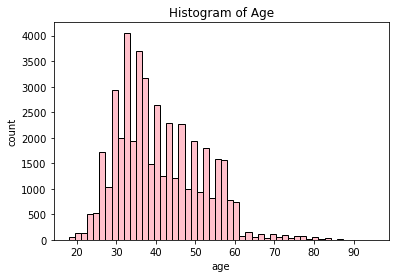

In [9]:
# matplotlib histogram
plt.hist(df_bank['age'], color = 'pink', edgecolor = 'black',
         bins = 50)

plt.title('Histogram of Age')
plt.xlabel('age')
plt.ylabel('count')

In [10]:
df_bank['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

<AxesSubplot:>

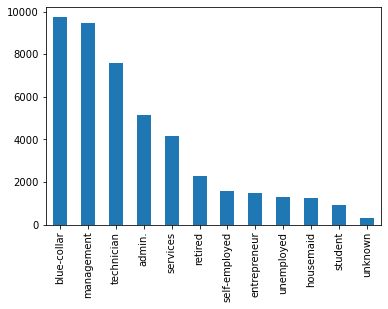

In [11]:
df_bank['job'].value_counts().head(20).plot(kind='bar')

In [12]:
df_bank['marital'].value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

In [13]:
df_bank['education'].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

In [14]:
df_bank['default'].value_counts()

no     44396
yes      815
Name: default, dtype: int64

In [15]:
df_bank['housing'].value_counts()

yes    25130
no     20081
Name: housing, dtype: int64

In [16]:
df_bank['loan'].value_counts()

no     37967
yes     7244
Name: loan, dtype: int64

In [17]:
df_bank['contact'].value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

Text(0, 0.5, 'count')

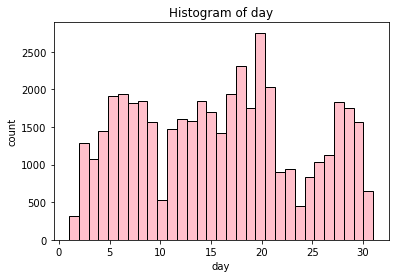

In [18]:
plt.hist(df_bank['day'], color = 'pink', edgecolor = 'black',
         bins = 31)

plt.title('Histogram of day')
plt.xlabel('day')
plt.ylabel('count')

In [19]:
df_bank['month'].value_counts()

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64

Text(0, 0.5, 'count')

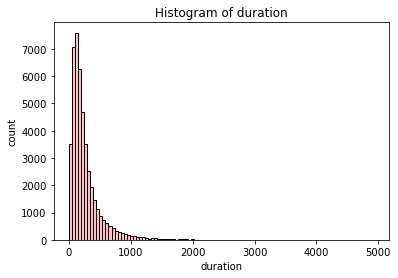

In [20]:
plt.hist(df_bank['duration'], color = 'pink', edgecolor = 'black',
         bins = 100)

plt.title('Histogram of duration')
plt.xlabel('duration')
plt.ylabel('count')

<AxesSubplot:>

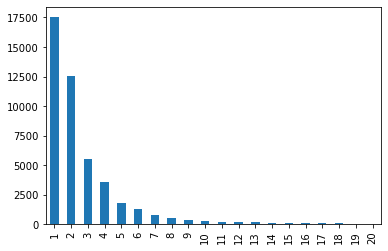

In [21]:
df_bank['campaign'].value_counts().head(20).plot(kind='bar')

<AxesSubplot:>

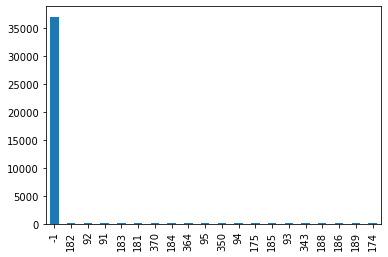

In [22]:
df_bank['pdays'].value_counts().head(20).plot(kind='bar')

<AxesSubplot:>

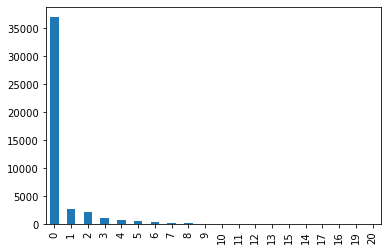

In [23]:
df_bank['previous'].value_counts().head(20).plot(kind='bar')

In [24]:
df_bank['poutcome'].value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

In [25]:
df_bank['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [50]:
# approach 1: remove unknown values if sample size is small
df_bank_clean_0 = df_bank.copy()
df_bank_clean_0 = df_bank_clean_0[df_bank_clean_0['job'] != 'unknown']
df_bank_clean_0 = df_bank_clean_0[df_bank_clean_0['education'] != 'unknown']

In [57]:
for i in range(len(df_bank_clean_0)):
     if df_bank_clean_0.iloc[i,8] == 'unknown':
        df_bank_clean_0.iloc[i,8] = np.random.choice(['cellular','telephone'],p=[0.91,0.09])

In [59]:
for i in range(len(df_bank_clean_0)):
     if df_bank_clean_0.iloc[i,15] == 'unknown':
        df_bank_clean_0.iloc[i,15] = np.random.choice(['failure','other','success'],p=[0.59,0.22,0.19])

In [ ]:
df_bank_clean_1 = df_bank_clean_1[df_bank_clean_1['age'] <= 70]

In [26]:
# approach 2: use mode to fill categorical variables
df_bank_clean_1 = df_bank.copy()
df_bank_clean_1['job'] = df_bank_clean_1['job'].replace('unknown','blue-collar')
df_bank_clean_1['education'] = df_bank_clean_1['education'].replace('unknown','secondary')
df_bank_clean_1['contact'] = df_bank_clean_1['contact'].replace('unknown','cellular')
df_bank_clean_1['poutcome'] = df_bank_clean_1['poutcome'].replace('unknown','failure')

{'whiskers': [<matplotlib.lines.Line2D at 0x7ff4302efd30>,
 'caps': [<matplotlib.lines.Line2D at 0x7ff430281b20>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ff430411070>],
 'medians': [<matplotlib.lines.Line2D at 0x7ff4304601f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ff4238f9250>],
 'means': []}

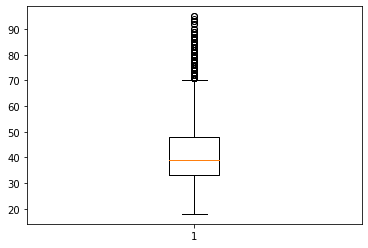

In [27]:
#remove outliers
plt.boxplot(df_bank_clean_1['age'])

In [28]:
df_bank_clean_0 = df_bank_clean_0[df_bank_clean_0['age'] <= 70]
df_bank_clean_1 = df_bank_clean_1[df_bank_clean_1['duration'] <= 480]
df_bank_clean_1 = df_bank_clean_1[df_bank_clean_1['campaign'] <= 6]

{'whiskers': [<matplotlib.lines.Line2D at 0x7ff4237bb640>,
 'caps': [<matplotlib.lines.Line2D at 0x7ff4237bb5b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ff4238445b0>],
 'medians': [<matplotlib.lines.Line2D at 0x7ff42177ce20>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ff4217d1490>],
 'means': []}

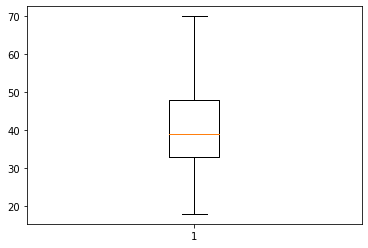

In [29]:
plt.boxplot(df_bank_clean_1['age'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7ff423819d60>,
 'caps': [<matplotlib.lines.Line2D at 0x7ff423829460>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ff423819a00>],
 'medians': [<matplotlib.lines.Line2D at 0x7ff423829b20>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ff423829e80>],
 'means': []}

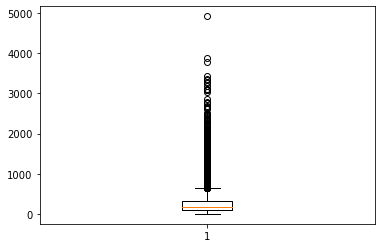

In [30]:
plt.boxplot(df_bank_clean_1['duration'])

In [31]:
df_bank_clean_1 = df_bank_clean_1[df_bank_clean_1['duration'] <= 480]

{'whiskers': [<matplotlib.lines.Line2D at 0x7ff4012e83a0>,
 'caps': [<matplotlib.lines.Line2D at 0x7ff4012e8a60>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ff4012e8040>],
 'medians': [<matplotlib.lines.Line2D at 0x7ff4012f6160>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ff4012f64c0>],
 'means': []}

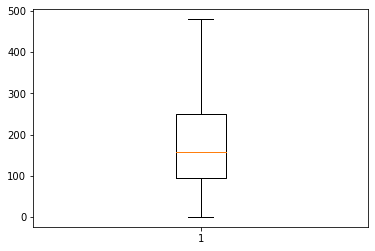

In [32]:
plt.boxplot(df_bank_clean_1['duration'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7ff4013a0a60>,
 'caps': [<matplotlib.lines.Line2D at 0x7ff4013ae160>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ff4013a0700>],
 'medians': [<matplotlib.lines.Line2D at 0x7ff4013ae820>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ff4013aeb80>],
 'means': []}

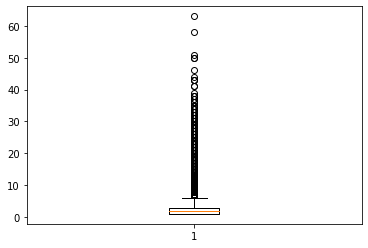

In [33]:
plt.boxplot(df_bank_clean_1['campaign'])

In [34]:
df_bank_clean_1 = df_bank_clean_1[df_bank_clean_1['campaign'] <= 6]

{'whiskers': [<matplotlib.lines.Line2D at 0x7ff4246b5610>,
 'caps': [<matplotlib.lines.Line2D at 0x7ff4246b5cd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ff4246b52b0>],
 'medians': [<matplotlib.lines.Line2D at 0x7ff4115913d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ff411591730>],
 'means': []}

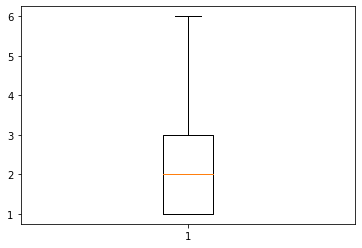

In [35]:
plt.boxplot(df_bank_clean_1['campaign'])

In [36]:
len(df_bank_clean_1)

36298